In [1]:
from voc12 import VOC2012
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import random
import pathlib
import torch

from model.Naive import Naive
from train import train, predict
from criterion.CrossEntropy import getCrossEntropyLoss



In [2]:
# !wget https://s3.amazonaws.com/fast-ai-imagelocal/pascal-voc.tgz 
# !tar -xzf ./pascal-voc.tgz
# !rm -rf ./pascal-voc/VOC2007

In [3]:
voc2012 = VOC2012('./pascal-voc/VOC2012/')

ptrain = pathlib.Path('./voc2012_train.h5')
pval = pathlib.Path('./voc2012_val.h5')

if ptrain.is_file() and pval.is_file():
    voc2012.load_all_data()
else:
    voc2012.read_all_data_and_save()

loading ./voc2012_train.h5
loading ./voc2012_val.h5


Train count:  1464
Val count:  1449
Train image:  (224, 224, 3)
Train label:  (224, 224)
Unique classes:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


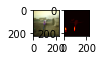

In [4]:
print("Train count: ", len(voc2012.train_images))
print("Val count: ", len(voc2012.val_images))

print("Train image: ", voc2012.train_images[0].shape)
print("Train label: ", voc2012.train_labels[0].shape)

print("Unique classes: ", np.unique(voc2012.train_labels))


plt.figure(figsize=(1,2)) # specifying the overall grid size


plt.subplot(1,2,1)    # the number of images in the grid is 5*5 (25)
plt.imshow(voc2012.train_images[0])

plt.subplot(1,2,2)    # the number of images in the grid is 5*5 (25)
plt.imshow(voc2012.train_labels[0], cmap='hot')

plt.show()



# f, axarr = plt.subplots(2,2)
# axarr[0,0].imshow(voc2012.train_images[0])


# axarr[0,1].imshow(voc2012.train_labels[0], cmap='hot')
# # axarr[0,1].colorbar()
# # plt.show()


In [5]:
# Naive model training 

naive = Naive()
criterion = getCrossEntropyLoss()
train(naive, voc2012, criterion, num_epochs=1, batch_size=64, learning_rate=1e-3, weight_decay=1e-5)

Epoch:1, Loss:1.7040


In [ ]:
def labelVisualize(num_class,color_dict,img):
    img_out = np.zeros(img.shape + (3,))
    for i in range(num_class):
        img_out[img == i,:] = color_dict[i]
        
    return (img_out / 255)

color_dict = range(100, 1000, 25)
color_dict = [*color_dict][:21]
print(color_dict)

plt.imshow(voc2012.train_images[1])
plt.show()


plt.imshow(voc2012.train_labels[1], cmap='hot')
plt.colorbar()
plt.show()

img = np.expand_dims(voc2012.train_images[1], axis=0)
# print(img.shape)

pred = predict(naive, img)

plt.imshow(labelVisualize(21, color_dict, pred))
